In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import molsim

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">

# Exercise 4: Random Walk on a 1D lattice

Consider the random walk of a single particle on a line. The probability that after $N$ jumps the particle is at a position $n$ with respect to its origin is:

\begin{equation}
\ln (P (n,N)) \approx \frac{1}{2} \ln \left( \frac{2}{\pi N} \right) - \frac{n^2}{2N}
\end{equation}

<img src="./figure/random1d.jpg" alt="示例图片" style="display: block; margin: auto; width:80%;" >


**A random walk of a single particle on a line. After $ N $ jumps the particle that started at the origin has traveled a distance $ n $. We are interested in $ \langle n^2 \rangle $ as a function of time. The update frequency $\tau = 1 $ (jump per time) and the lattice spacing $ \lambda = 1 $. Hence, time is equal to the number of jumps $N$.**

In [ ]:
@numba.jit
def randomWalk1D(numberOfCycles: int, jumpsPerCycle: int, p: float = 0.5):
    """
    Perform a 1D random walk simulation and calculate the position distribution and mean squared displacement (MSD).

    Parameters
    ----------
    numberOfCycles : int
        The number of full cycles (trials) for the simulation.
    jumpsPerCycle : int
        The number of steps taken in each cycle.
    p : float, optional
        The probability of stepping to the right at each jump. Default is 0.5.

    Returns
    -------
    distribution : ndarray
        The normalized distribution of final positions after all cycles.
        The array is of length (2 * jumpsPerCycle + 1), indexed so that the central index
        corresponds to position 0.
    msd : ndarray
        The mean squared displacement for each timestep, averaged over all cycles.
    """
    if not (0.0 < p <= 1.0):
        raise ValueError("Probability parameter p should be between (0, 1).")

    # Initialize arrays for distribution, positions, and MSD.
    # distribution tracks the frequency of final positions over all cycles.
    distribution = np.zeros(2 * jumpsPerCycle + 1)
    # positions holds the positions at each step for a single cycle.
    positions = np.zeros(jumpsPerCycle)
    # msd holds the cumulative MSD values, which will be averaged after all cycles.
    msd = np.zeros(jumpsPerCycle)

    for cycle in range(numberOfCycles):
        currentPosition = 0

        # Perform a single cycle: take jumpsPerCycle steps.
        for k in range(jumpsPerCycle):
            # Step right with probability p, otherwise step left.
            currentPosition += 1 if np.random.rand() < p else -1
            positions[k] = currentPosition

        # Update MSD and position distribution.
        msd += sampleMSD1D(positions, jumpsPerCycle)
        # Shift index by jumpsPerCycle so that 0 position maps to the center of 'distribution'.
        distribution[int(currentPosition + jumpsPerCycle)] += 1

    # Normalize distribution and MSD.
    distribution /= numberOfCycles * jumpsPerCycle
    msd /= numberOfCycles
    return distribution, msd


@numba.jit
def sampleMSD1D(positions: np.ndarray, jumpsPerCycle: int):
    """
    Compute the mean squared displacement (MSD) for a given set of positions.

    The MSD at time lag `dt` is computed by taking the average of (x(t+dt)-x(t))^2
    over all valid t.

    Parameters
    ----------
    positions : ndarray
        An array of positions recorded for each step in a single cycle.
    jumpsPerCycle : int
        The number of steps taken in a cycle.

    Returns
    -------
    msd : ndarray
        Array of MSD values for each time lag from 0 to jumpsPerCycle-1.
        Note that msd[0] is always 0 by definition.
    """
    msd = np.zeros(jumpsPerCycle)
    # For each time lag dt, compute the average squared displacement.
    for dt in range(1, jumpsPerCycle):
        msd[dt] = np.mean((positions[dt:] - positions[:-dt]) ** 2)
    return msd

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">


#### Question 1:

Derive equation 1. Useful information: 


(i) Consider that the probability to jump to one direction
equals the probability to jump to the other direction.

(ii) To get the probability of finding a particle at n after N jumps, you can calculate the binomial coefficient and relate it with the probabilities to jump in each direction.


(iii) For large values of $y$, $y!$ can be approximated by the Stirling's approximation:

$$
\ln{(x!)} \approx x \ln{x} - x + \ln{(\sqrt{2\pi x})}
$$

(iv) You might find it handy to use the Taylor series expansion for ln(1+x):

$$
\ln(1+x) \approx x
$$

(v) It can be useful to note that $(N > n \therefore \frac{n^{2}}{N} >> \frac{n^{2}}{N^{2}})$.

(Hint: Note that equation you derived might not be normalized. The standard Gaussian integral might be useful).

</div>


### Answer


$$

$$


<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">


#### Question 2:


Modify and run the code for a determined number of cycles and a determined number of jumps per cycle (e.g.: 10000 cycles and 100 jumps/cycle). The code computes the distribution based on sampling, and the probability based on the equation you derived. Plot and compare the two: are they similar?

</div>

In [3]:
def randomWalk1D_formula(poisitons, JumpperCycle):
    """
    Use the derived formula to calculate the position distributionfor a 1D random walk.

    Parameters
    ----------
    JumpperCycle : int
        The number of jumps taken in one cycle.
        
    Positions : ndarray
        The positions required to calculate the probability
    Returns
    -------
        The probability distribution of final positions after one cycles.
    """
    # start refactor
    distributions = 0.5 * np.log(2 * np.pi * JumpperCycle) - poisitons**2/(2 * JumpperCycle)
    # end refactor
    return distributions

In [5]:
numberOfCycles = 10000
jumpsPerCycle = 100
p = 0.5

walk, msd = randomWalk1D(numberOfCycles, jumpsPerCycle, p)
# start refactor
positions = np.arange(-jumpsPerCycle, jumpsPerCycle + 1)
theo_walk = randomWalk1D_formula(positions, jumpsPerCycle)
# end refactor


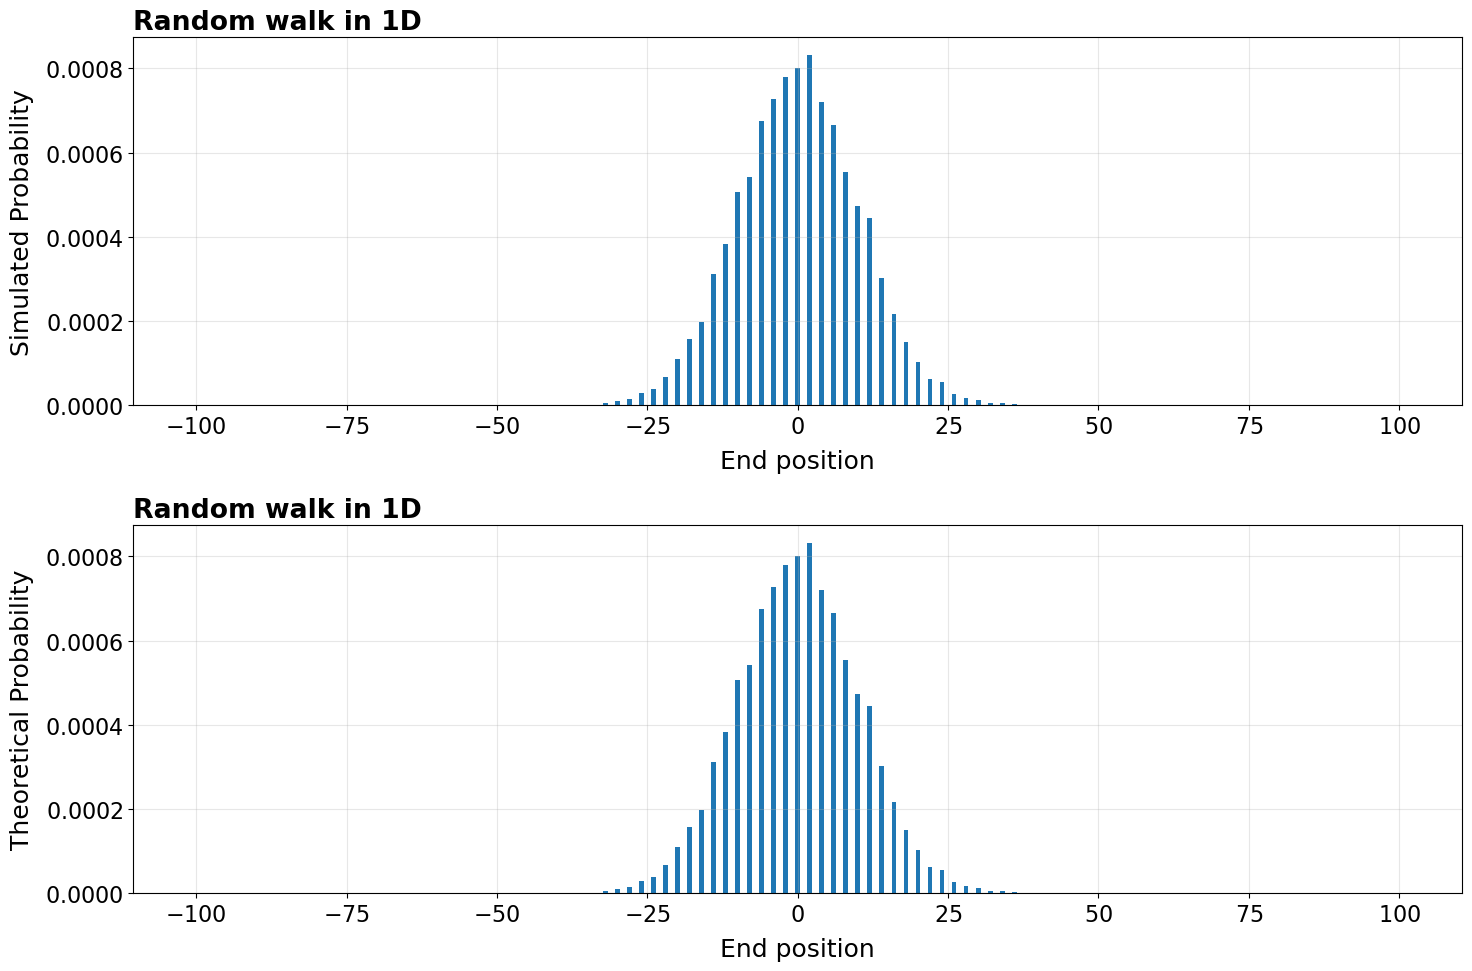

In [6]:
fig, ax = plt.subplots(2, figsize=(15, 10))

# Plot 1: Simulated distribution
ax[0].bar(np.arange(-jumpsPerCycle, jumpsPerCycle + 1), walk)
ax[0].set_title("Random walk in 1D", weight="bold", loc="left")
ax[0].set_xlabel("End position")
ax[0].set_ylabel("Simulated Probability")
ax[0].grid(alpha=0.3)

# Plot 2: Theoretical distribution
ax[1].bar(np.arange(-jumpsPerCycle, jumpsPerCycle + 1), walk)
ax[1].set_title("Random walk in 1D", weight="bold", loc="left")
ax[1].set_xlabel("End position")
ax[1].set_ylabel("Theoretical Probability")
ax[1].grid(alpha=0.3)

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">


#### Question3:

We are now interested in the diffusivity of our system. From the concentration profile (the first equation below, see book), we can relate the expectation value of the mean square displacement (which can also be computed by sampling) with the diffusion coefficient D  in the case of 1D (d=1). 


\begin{equation} 
c(x,t)=\frac{1}{{(4\pi Dt)}^{d/2}}
 e^{\frac{-x^2}{4 Dt}},
\end{equation}

we conclude that:

\begin{equation} 
D=\frac{1}{2}\left\langle x^2\right\rangle.
\end{equation}

we conclude that:

\begin{equation} 
\frac{\partial{\left\langle x^2\right\rangle}}{\partial{t}} = 2dD
%D=\frac{1}{2}\left\langle r^2\right\rangle.
\end{equation}


Compare this theoretical result with the computed root mean square displacement and the computed distribution $ P(n,N) $. What is the diffusion coefficient, $ D $, of this system? (see also page 86-88 (2nd editon) or page 148-151 (3rd edition) in the book).

</div>


In [7]:
numberOfCycles = 10000
jumpsPerCycle = 100
p = 0.5

walk, msd = randomWalk1D(numberOfCycles, jumpsPerCycle, p)

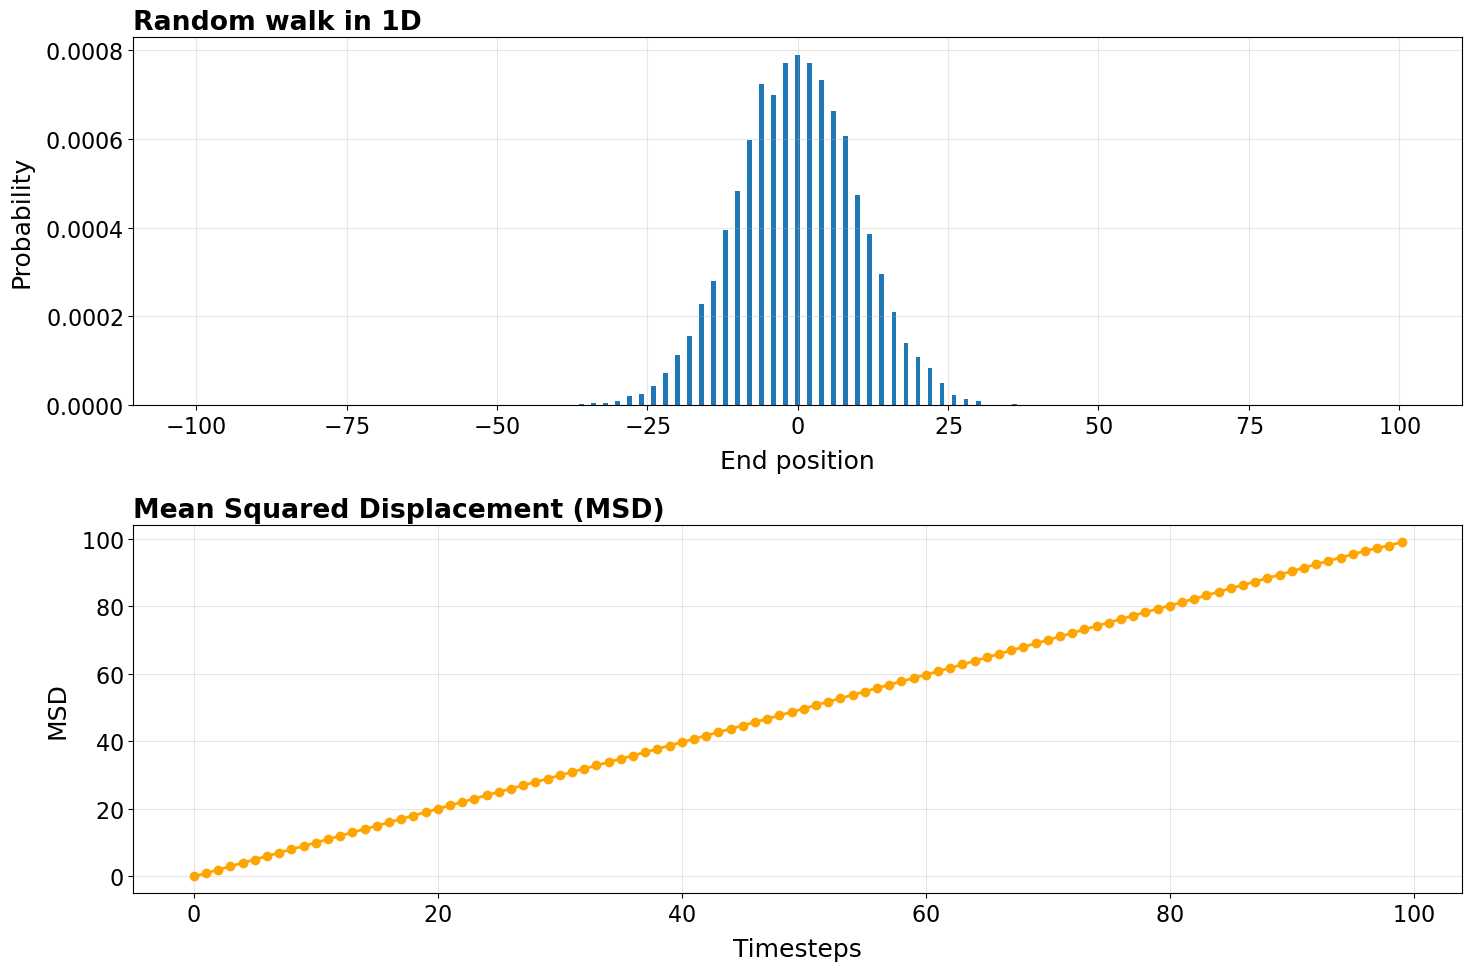

In [8]:
fig, ax = plt.subplots(2, figsize=(15, 10))

# Plot 1: Position distribution
ax[0].bar(np.arange(-jumpsPerCycle, jumpsPerCycle + 1), walk)
ax[0].set_title("Random walk in 1D", weight="bold", loc="left")
ax[0].set_xlabel("End position")
ax[0].set_ylabel("Probability")
ax[0].grid(alpha=0.3)

# Plot 2: Mean Squared Displacement (MSD)
ax[1].plot(msd, color="orange", lw=2, label="Mean Squared Displacement", marker="o")
ax[1].set_title("Mean Squared Displacement (MSD)", weight="bold", loc="left")
ax[1].set_xlabel("Timesteps")
ax[1].set_ylabel("MSD")
ax[1].grid(alpha=0.3)

fig.tight_layout()

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">

#### Question3:

Modify the program in such a way that the probability to jump in one direction equals 0.8. What happens?
</div>

### Answer
If we set $p=0.8$ we shift the distribution to the right as expected. We can also set $p=0.2$ to shift the distribution to the left.

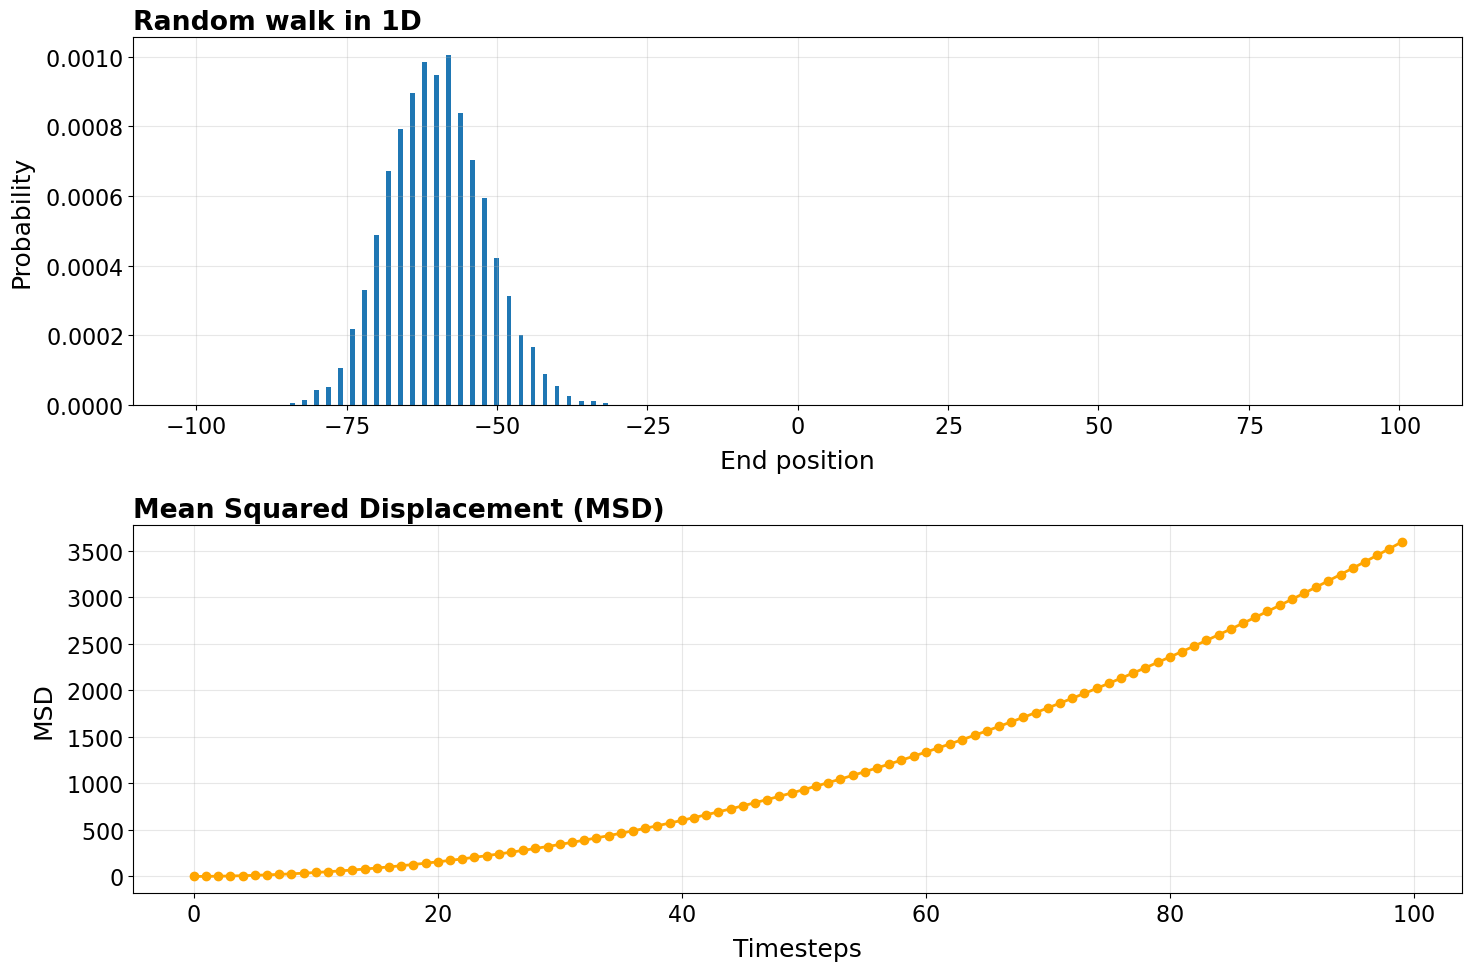

In [ ]:
p=0.8
walk, msd = randomWalk1D(numberOfCycles, jumpsPerCycle, p)

fig, ax = plt.subplots(2, figsize=(15, 10))

# Plot 1: Position distribution
ax[0].bar(np.arange(-jumpsPerCycle, jumpsPerCycle + 1), walk)
ax[0].set_title("Random walk in 1D", weight="bold", loc="left")
ax[0].set_xlabel("End position")
ax[0].set_ylabel("Probability")
ax[0].grid(alpha=0.3)

# Plot 2: Mean Squared Displacement (MSD)
ax[1].plot(msd, color="orange", lw=2, label="Mean Squared Displacement", marker="o")
ax[1].set_title("Mean Squared Displacement (MSD)", weight="bold", loc="left")
ax[1].set_xlabel("Timesteps")
ax[1].set_ylabel("MSD")
ax[1].grid(alpha=0.3)

fig.tight_layout()
